# import library

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules , apriori, fpmax, fpgrowth


# load data

In [16]:
data = pd.read_csv('data/customer_data.csv',names = ['CustomerId','CustomerCode','CustomerName','AreaName','IndustryName','OrderNumber','OrderDate','ProductCode','ProductName','Length'],header=None)

In [17]:
data.drop_duplicates(inplace=True)
df2 = data.copy()

# pre-process data

In [18]:
data = data.groupby(['CustomerId'])['ProductName'].apply(list).reset_index(name='products')
data['products'] = data['products'].apply(lambda x: list(set(x)))

In [19]:
data

,CustomerId,products
0,2,"[PLATE MEDIUM TENSILE GR350, SHEET ELECTRO GAL..."
1,3,[SHEET ELECTRO GALV]
2,4,[RYDAL FLAT S1010]
3,11,"[UNEQUAL ANGLE AS/NZS 3679 GRADE 300, SHS NOP ..."
4,13,[UNEQUAL ANGLE AS/NZS 3679 GRADE 300]
...,...,...
2323,12279,[SHEET ELECTRO GALV]
2324,12379,[BLK PIPE LGT P/E(33.7OD) AS1074 C250]
2325,12384,[BLK PIPE LGT P/E(33.7OD) AS1074 C250]
2326,13963,[BLK PIPE LGT P/E(33.7OD) AS1074 C250]


In [20]:
# Create transaction encoder
te = TransactionEncoder()
te_ary = te.fit_transform(data['products'])
df = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
df

,BLK PIPE LGT P/E(33.7OD) AS1074 C250,BRIGHT FREE CUTTING,COLORSTEEL CLOUD ENDURA G300,COLORSTEEL DESERT SAND ENDURA G300,COLORSTEEL ENDURA CLOUD ENDURA G300,COLORSTEEL ENDURA DESERT SAND (SF) G300,COLORSTEEL ENDURA DESERT SAND ENDURA (SF) G300,E.W.S.SQUARE TUBE,GALV PIPE MED S/S (114.1OD) AS1074 C250,PLATE AS 3678-450,PLATE MEDIUM TENSILE GR350,Plate Medium Tensile,RHS C350 PAINTED,RHS NOP AS 1163 C350 LO,RYDAL FLAT S1010,SHEET ELECTRO GALV,SHS C350 Painted,SHS NOP AS/NZS 1163 G450 LO,UNEQUAL ANGLE AS/NZS 3679 GRADE 300,ZINC ALUMINIUM G300 AZ150
0,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2324,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2325,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2326,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Models

## FP growth

In [22]:
# Perform frequent pattern mining
frequent_items = fpgrowth(df, min_support=0.001, use_colnames=True)
frequent_items

,support,itemsets
0,0.280498,(SHEET ELECTRO GALV)
1,0.215636,(PLATE MEDIUM TENSILE GR350)
2,0.058849,(RHS NOP AS 1163 C350 LO)
3,0.046821,(E.W.S.SQUARE TUBE)
4,0.165378,(RYDAL FLAT S1010)
...,...,...
483,0.001289,"(PLATE AS 3678-450, BLK PIPE LGT P/E(33.7OD) A..."
484,0.001289,"(PLATE AS 3678-450, SHEET ELECTRO GALV)"
485,0.002148,"(PLATE MEDIUM TENSILE GR350, PLATE AS 3678-450..."
486,0.001289,"(PLATE AS 3678-450, SHS NOP AS/NZS 1163 G450 L..."


## fpmax

In [23]:
# # Perform frequent pattern mining
# frequent_items = fpmax(df, min_support=0.001, use_colnames=True)
# frequent_items

## Apriori

In [24]:
# # Perform frequent pattern mining
# frequent_items = apriori(df, min_support=0.001, use_colnames=True)
# frequent_items

In [25]:
# Generate association rules
# if you are only interested in rules that have a lift score of >= 1.2
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(PLATE MEDIUM TENSILE GR350, SHS NOP AS/NZS 11...",(SHEET ELECTRO GALV),0.065722,0.280498,0.023196,0.352941,1.258265,0.004761,1.111957,0.219693
1,"(SHS NOP AS/NZS 1163 G450 LO, SHEET ELECTRO GALV)",(PLATE MEDIUM TENSILE GR350),0.074313,0.215636,0.023196,0.312139,1.447528,0.007171,1.140294,0.333986
2,(PLATE MEDIUM TENSILE GR350),"(SHS NOP AS/NZS 1163 G450 LO, SHEET ELECTRO GALV)",0.215636,0.074313,0.023196,0.107570,1.447528,0.007171,1.037266,0.394163
3,(SHEET ELECTRO GALV),"(PLATE MEDIUM TENSILE GR350, SHS NOP AS/NZS 11...",0.280498,0.065722,0.023196,0.082695,1.258265,0.004761,1.018504,0.285274
4,"(PLATE MEDIUM TENSILE GR350, SHEET ELECTRO GALV)",(BLK PIPE LGT P/E(33.7OD) AS1074 C250),0.054553,0.237113,0.017612,0.322835,1.361520,0.004676,1.126588,0.280848
...,...,...,...,...,...,...,...,...,...,...
13029,(PLATE AS 3678-450),"(SHS NOP AS/NZS 1163 G450 LO, BLK PIPE LGT P/E...",0.006014,0.077749,0.001289,0.214286,2.756117,0.000821,1.173774,0.641026
13030,(SHS NOP AS/NZS 1163 G450 LO),"(PLATE AS 3678-450, BLK PIPE LGT P/E(33.7OD) A...",0.376289,0.001289,0.001289,0.003425,2.657534,0.000804,1.002143,1.000000
13031,(BLK PIPE LGT P/E(33.7OD) AS1074 C250),"(PLATE AS 3678-450, SHS NOP AS/NZS 1163 G450 LO)",0.237113,0.003007,0.001289,0.005435,1.807453,0.000576,1.002441,0.585586
13032,(RHS C350 PAINTED),(SHS NOP AS/NZS 1163 G450 LO),0.001289,0.376289,0.001289,1.000000,2.657534,0.000804,inf,0.624516


# get recommendations

In [26]:

def get_top_recommendations(customer_id):
    # Get products for customer
    products = data.loc[data['CustomerId']==customer_id, 'products'].iloc[0]

    recommendations = pd.DataFrame()
    
    for product in products:
        
        antecedent = set([product]) #   set containing only the current product
         
        # all other products that are frequently purchased with the current product
        consequent = set(frequent_items['itemsets'].apply(lambda x: x.difference(antecedent)).tolist()) 
        
        # association rules to keep only those that contain the current product as the antecedent
        filtered_rules = rules[rules['antecedents']==antecedent]
        
        #rules further to keep only those whose consequent contains at least one product that the customer hasn't purchased yet
        filtered_rules = filtered_rules[filtered_rules['consequents'].isin(consequent)]
        if not filtered_rules.empty:
            filtered_rules['product'] = product
            recommendations = pd.concat([recommendations, filtered_rules])
    
    if not recommendations.empty:
        # Calculate score based on support and lift
        recommendations['score'] = recommendations['support'] * recommendations['lift']
        # Sort by score and return top 10 recommended products
        recommendations = recommendations.sort_values('score', ascending=False)
        # print(type(recommendations))
        recommended_products = (recommendations['consequents'].tolist())[:20]
    else:
        # If no rules match, return top 10 most popular products
        recommended_products = frequent_items.sort_values('support', ascending=False).head(10)['itemsets'].tolist()
        
    final_products = []
    for item in recommended_products:
        i = list(item)[0]
        if i not in final_products:
            final_products.append(i)
    return (final_products)


In [30]:
customer_id = 1662
recommended_products = get_top_recommendations(customer_id)
print(recommended_products)

['UNEQUAL ANGLE AS/NZS 3679 GRADE 300', 'SHEET ELECTRO GALV', 'SHS NOP AS/NZS 1163 G450 LO', 'RYDAL FLAT S1010', 'PLATE MEDIUM TENSILE GR350']


Lift vs Confidence

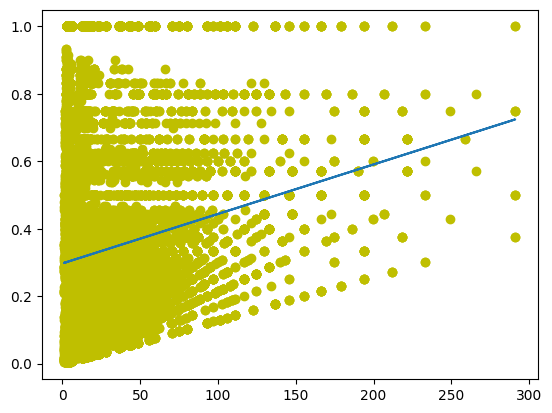

In [28]:
import numpy as np
import matplotlib.pyplot as plt
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))